David Culhane

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Loading the Data for NC and 2018
data = pd.read_excel('nationaldatabaseofchildcareprices.xlsx')
ncdata = data[data['State_Name'] == 'North Carolina']
nc2018 = ncdata[ncdata['StudyYear'] == 2018]

In [6]:
nc2018

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
20799,North Carolina,NC,Alamance County,37001,2018,5.65,5.63,5.68,5.0,5.3,...,139.99,1.0,144.99,1.0,169.99,1.0,184.80,1.0,164.99,1.0
20810,North Carolina,NC,Alexander County,37003,2018,6.71,6.43,6.95,5.6,5.4,...,89.99,1.0,89.99,1.0,125.31,3.0,125.31,1.0,89.99,1.0
20821,North Carolina,NC,Alleghany County,37005,2018,5.87,7.62,4.45,4.8,6.1,...,105.46,1.0,99.99,1.0,131.31,3.0,107.77,1.0,103.15,1.0
20832,North Carolina,NC,Anson County,37007,2018,9.91,12.41,7.76,9.4,11.6,...,129.69,1.0,102.00,1.0,139.99,3.0,194.99,1.0,129.99,1.0
20843,North Carolina,NC,Ashe County,37009,2018,4.63,3.76,5.43,4.3,3.2,...,174.99,1.0,249.98,1.0,99.99,1.0,249.98,1.0,249.98,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21844,North Carolina,NC,Wayne County,37191,2018,7.77,7.38,8.14,6.9,6.5,...,124.99,1.0,114.99,1.0,140.24,3.0,124.99,1.0,114.99,1.0
21855,North Carolina,NC,Wilkes County,37193,2018,5.79,5.28,6.24,5.3,4.7,...,119.99,1.0,99.99,1.0,134.99,1.0,124.99,1.0,109.99,1.0
21866,North Carolina,NC,Wilson County,37195,2018,7.99,7.45,8.55,7.6,7.5,...,106.42,1.0,129.99,1.0,129.99,1.0,114.99,1.0,129.99,1.0
21877,North Carolina,NC,Yadkin County,37197,2018,5.35,6.02,4.78,4.4,4.6,...,102.49,1.0,99.99,1.0,104.99,3.0,104.99,1.0,104.99,1.0


**Billboard Data**
<br>
<br>
For the billboard information, we need to think about what area would need it most. To do that, we will want to create some fields where they show the measure of the percentage of the median household income devoted to childcare for each age group. An important note to make is that the costs in the database are weekly, so they will need to be annualized before working with the median household income information.

In [8]:
nc2018['Ann_Inf_Perc'] = (nc2018['MCInfant'] * 52) / nc2018['MHI']
nc2018['Ann_Todd_Perc'] = (nc2018['MCToddler'] * 52) / nc2018['MHI']
nc2018['Ann_Pre_Perc'] = (nc2018['MCPreschool'] * 52) / nc2018['MHI']
nc2018['Ann_SA_Perc'] = (nc2018['MCSA'] * 52) / nc2018['MHI']

C:\Users\dman1\AppData\Local\Temp\ipykernel_36032\1115224259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc2018['Ann_Inf_Perc'] = (nc2018['MCInfant'] * 52) / nc2018['MHI']
C:\Users\dman1\AppData\Local\Temp\ipykernel_36032\1115224259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nc2018['Ann_Todd_Perc'] = (nc2018['MCToddler'] * 52) / nc2018['MHI']
C:\Users\dman1\AppData\Local\Temp\ipykernel_36032\1115224259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [9]:
print(nc2018.sort_values(by='Ann_Inf_Perc', ascending=False)['County_Name'].iloc[0:3])
print(nc2018.sort_values(by='Ann_Inf_Perc', ascending=False)['Ann_Inf_Perc'].iloc[0:3])

20854          Avery County
21514    Northampton County
21140         Durham County
Name: County_Name, dtype: object
20854    0.295877
21514    0.260623
21140    0.258811
Name: Ann_Inf_Perc, dtype: float64


In [10]:
print(nc2018.sort_values(by='Ann_Todd_Perc', ascending=False)['County_Name'].iloc[0:3])
print(nc2018.sort_values(by='Ann_Todd_Perc', ascending=False)['Ann_Todd_Perc'].iloc[0:3])

21514    Northampton County
21888         Yancey County
21536         Orange County
Name: County_Name, dtype: object
21514    0.240686
21888    0.214203
21536    0.204071
Name: Ann_Todd_Perc, dtype: float64


In [11]:
print(nc2018.sort_values(by='Ann_Pre_Perc', ascending=False)['County_Name'].iloc[0:3])
print(nc2018.sort_values(by='Ann_Pre_Perc', ascending=False)['Ann_Pre_Perc'].iloc[0:3])

20876      Bertie County
21404    McDowell County
21833     Watauga County
Name: County_Name, dtype: object
20876    0.218540
21404    0.202977
21833    0.185563
Name: Ann_Pre_Perc, dtype: float64


In [12]:
print(nc2018.sort_values(by='Ann_SA_Perc', ascending=False)['County_Name'].iloc[0:3])
print(nc2018.sort_values(by='Ann_SA_Perc', ascending=False)['Ann_SA_Perc'].iloc[0:3])

20876      Bertie County
21404    McDowell County
21833     Watauga County
Name: County_Name, dtype: object
20876    0.168616
21404    0.156599
21833    0.143164
Name: Ann_SA_Perc, dtype: float64


The top percentage for any of the age groups is just under 30% with Avery County, just outside of Boone, NC. This area tends to skew conservative so it may be an interesting target for the billboard to sway voters since programs to fund childcare centers would skew liberal. A billboard cannot be complex and would need to be memorable, so no graph will be used here. We will want a bold number to attract drivers' attention. 

**Infographic Data**
<br>
<br>
With Avery County being targeted with the billboard, it makes sense to tailor the infographic to that audience as well. We can index the NC data for Avery County to show trends over the years in the county.

In [15]:
averyraw = ncdata[ncdata['County_Name'] == 'Avery County']
avery = averyraw.get(['StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
avery['Inf_Perc'] = (avery['MCInfant'] * 52) / avery['MHI'] * 100
avery['Todd_Perc'] = (avery['MCToddler'] * 52) / avery['MHI'] * 100
avery['Pre_Perc'] = (avery['MCPreschool'] * 52) / avery['MHI'] * 100
avery['SA_Perc'] = (avery['MCSA'] * 52) / avery['MHI'] * 100

In [16]:
display(avery)

,StudyYear,MHI,MCInfant,MCToddler,MCPreschool,MCSA,Inf_Perc,Todd_Perc,Pre_Perc,SA_Perc
20850,2014,38138.0,154.51,140.06,134.44,103.73,21.066967,19.096754,18.330484,14.143269
20851,2015,37777.0,150.88,139.66,132.08,101.90,20.768616,19.224184,18.180798,14.026524
20852,2016,35891.0,172.91,139.26,129.72,100.08,25.051740,20.176423,18.794238,14.499902
20853,2017,37109.0,194.95,138.86,127.35,98.26,27.317901,19.458137,17.845267,13.768951
20854,2018,38134.0,216.98,138.46,124.99,96.43,29.587665,18.880579,17.043793,13.149316


Text(2016.4, 22, '     Infant childcare now costs \n    almost 30% of the median \nhousehold income each year')

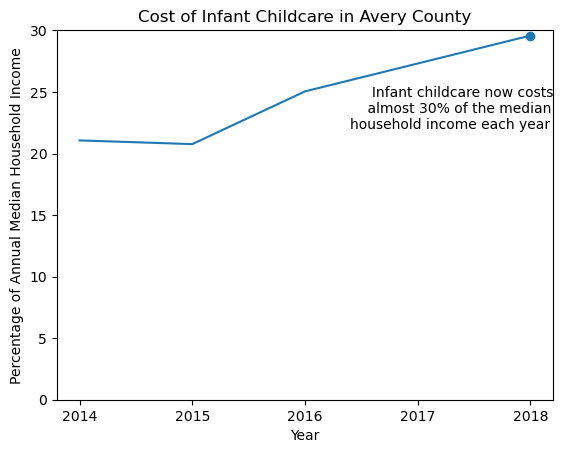

In [17]:
sns.lineplot(data=avery, x='StudyYear', y='Inf_Perc')
plt.scatter(2018, avery['Inf_Perc'].loc[20854])
plt.xlabel('Year')
plt.xticks(np.arange(2014, 2019, step=1))
plt.ylabel('Percentage of Annual Median Household Income')
plt.yticks(np.arange(0, 35, step=5))
plt.title('Cost of Infant Childcare in Avery County')
plt.text(2016.4, 22, '     Infant childcare now costs \n\
    almost 30% of the median \n\
household income each year')

In [18]:
northamptonraw = ncdata[ncdata['County_Name'] == 'Northampton County']
northampton = northamptonraw.get(['StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
northampton['Inf_Perc'] = (northampton['MCInfant'] * 52) / northampton['MHI'] * 100
northampton['Todd_Perc'] = (northampton['MCToddler'] * 52) / northampton['MHI'] * 100
northampton['Pre_Perc'] = (northampton['MCPreschool'] * 52) / northampton['MHI'] * 100
northampton['SA_Perc'] = (northampton['MCSA'] * 52) / northampton['MHI'] * 100

In [19]:
northampton

,StudyYear,MHI,MCInfant,MCToddler,MCPreschool,MCSA,Inf_Perc,Todd_Perc,Pre_Perc,SA_Perc
21510,2014,31468.0,142.31,126.44,133.76,103.20,23.516334,20.893860,22.103470,17.053515
21511,2015,30429.0,146.83,135.91,128.53,99.17,25.091722,23.225607,21.964442,16.947123
21512,2016,31543.0,157.19,145.38,123.30,95.13,25.913451,23.966522,20.326538,15.682592
21513,2017,33508.0,167.56,154.84,118.07,91.10,26.003104,24.029127,18.322908,14.137519
21514,2018,35499.0,177.92,164.31,112.85,87.06,26.062255,24.068622,16.530606,12.752810


In [20]:
durhamraw = ncdata[ncdata['County_Name'] == 'Durham County']
durham =durhamraw.get(['StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
durham['Inf_Perc'] = (durham['MCInfant'] * 52) / durham['MHI'] * 100
durham['Todd_Perc'] = (durham['MCToddler'] * 52) / durham['MHI'] * 100
durham['Pre_Perc'] = (durham['MCPreschool'] * 52) / durham['MHI'] * 100
durham['SA_Perc'] = (durham['MCSA'] * 52) / durham['MHI'] * 100

In [21]:
durham

,StudyYear,MHI,MCInfant,MCToddler,MCPreschool,MCSA,Inf_Perc,Todd_Perc,Pre_Perc,SA_Perc
21136,2014,52038.0,207.15,193.21,194.38,149.97,20.699873,19.306891,19.423806,14.986049
21137,2015,52503.0,215.94,199.89,189.03,145.84,21.387121,19.797497,18.721902,14.444279
21138,2016,54093.0,240.50,206.56,183.68,141.72,23.119442,19.856765,17.657294,13.623648
21139,2017,56393.0,265.06,213.24,178.34,137.59,24.441190,19.662866,16.444736,12.687177
21140,2018,58190.0,289.62,219.92,172.99,133.46,25.881148,19.652586,15.458807,11.926310


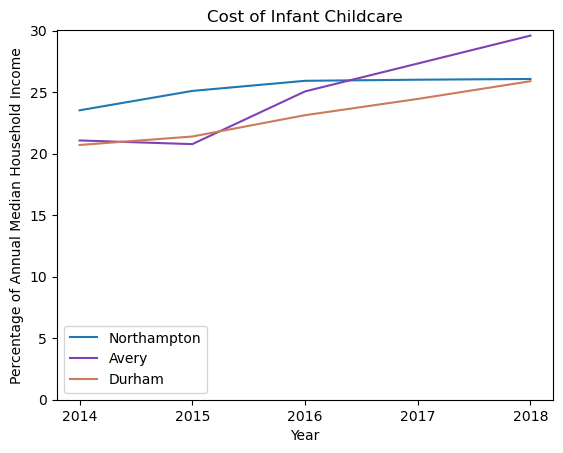

In [22]:
infoplot = sns.lineplot(data=northampton, x='StudyYear', y='Inf_Perc', label='Northampton')
sns.lineplot(data=avery, x='StudyYear', y='Inf_Perc', label='Avery', color=(0.49, 0.26, 0.70))
sns.lineplot(data=durham, x='StudyYear', y='Inf_Perc', label='Durham', color=(0.8, 0.48, 0.35))
plt.xlabel('Year')
plt.xticks(np.arange(2014, 2019, step=1))
plt.ylabel('Percentage of Annual Median Household Income')
plt.yticks(np.arange(0, 35, step=5))
plt.title('Cost of Infant Childcare')
plt.legend()
fig2 = infoplot.get_figure()
fig2.savefig('Infographic Plot.png')

**Powerpoint Regional Slides**
<br>
<br>
We will need to split the counties of NC up by regions to make it easier to aggregate the data.
<br>
Charlotte: Mecklenburg, Union, Gaston, Lincoln, Cabarrus, Iredell, Rowan, Cleveland, Stanly, Anson, Catawba
<br>
Triad: Forsyth, Guilford, Davie, Davidson, Randolph, Surry, Stokes, Yadkin, Rockingham
<br>
Triangle: Orange, Durham, Wake, Chatham, Alamance, Person, Granville, Johnston, Franklin, Nash, Warren, Caswell, Vance
<br>
Wilmington: New Hanover, Brunswick, Columbus, Pender, Onslow
<br>
Asheville: Buncombe, Madison, Yancey, McDowell, Rutherford, Polk, Henderson, Haywood, Transylvania, Mitchell
<br>
Boone: Watauga, Ashe, Avery, Caldwell, Wilkes, Alleghany, Alexander, Burke
<br>
Fayetteville/Lumberton: Robeson, Cumberland, Scotland, Hoke, Bladen, Sampson, Harnett, Moore, Lee, Duplin, Richmond, Montgomery
<br>
Greenville: Pitt, Beaufort, Greene, Lenoir, Craven, Edgecomb, Martin, Wayne, Wilson, Jones
<br>
Other Coast/NE NC: Carteret, Pamlico, Hyde, Dare, Tyrell, Washington, Currituck, Pasquotank, Camden, Gates, Bertie, Chowan, Perquimans, Hertford, Halifax, Northampton
<br>
Other Mountains: Cherokee, Clay, Graham, Macon, Swain, Jackson
<br>
<br>
To filter the data, we can make a filtering function that takes in a list of counties, filters for each county individually in the nc2018 data, and concatenate each result to create regional datasets for analysis.

In [24]:
def region_maker(counties, df):
    regional_df = pd.DataFrame()
    for county in counties:
        name = county + ' County'
        county_data = df[df['County_Name'] == name]
        regional_df = pd.concat([regional_df, county_data], ignore_index=True)
    
    return(regional_df)


def perc_maker(df):
    df['Inf_Perc'] = (df['MCInfant'] * 52) / df['MHI'] * 100
    df['Todd_Perc'] = (df['MCToddler'] * 52) / df['MHI'] * 100
    df['Pre_Perc'] = (df['MCPreschool'] * 52) / df['MHI'] * 100
    df['SA_Perc'] = (df['MCSA'] * 52) / df['MHI'] * 100



In [25]:
# List of counties to make regions
clt = ['Mecklenburg', 'Union', 'Gaston', 'Lincoln', 'Cabarrus', 'Iredell', 'Rowan', 'Cleveland', 'Stanly', 'Anson', 'Catawba']
triad = ['Forsyth', 'Guilford', 'Davie', 'Davidson', 'Randolph', 'Surry', 'Stokes', 'Yadkin', 'Rockingham']
triangle = ['Orange', 'Durham', 'Wake', 'Chatham', 'Alamance', 'Person', 'Granville', 'Johnston', 'Franklin', 'Nash', 'Warren', 'Caswell', 'Vance']
wilm = ['New Hanover', 'Brunswick', 'Columbus', 'Pender', 'Onslow']
asheville = ['Buncombe', 'Madison', 'Yancey', 'McDowell', 'Rutherford', 'Polk', 'Henderson', 'Haywood', 'Transylvania', 'Mitchell']
boone = ['Watauga', 'Ashe', 'Avery', 'Caldwell', 'Wilkes', 'Alleghany', 'Alexander', 'Burke']
faylumb = ["Robeson", 'Cumberland', 'Scotland', 'Hoke', 'Bladen', 'Sampson', 'Harnett', 'Moore', 'Lee', 'Duplin', 'Richmond', 'Montgomery']
gville = ['Pitt', 'Beaufort', 'Greene', 'Lenoir', 'Craven', 'Edgecomb', 'Martin', 'Wayne', 'Wilson', 'Jones']
necoast =['Carteret', 'Pamlico', 'Hyde', 'Dare', 'Tyrell', 'Washington', 'Currituck', 'Pasquotank', 'Camden', 'Gates',
          'Bertie', 'Chowan', 'Perquimans', 'Hertford', 'Halifax', 'Northampton'] 
mount = ['Cherokee', 'Clay', 'Graham', 'Macon', 'Swain', 'Jackson']

In [26]:
# Making the regional dataframes
clt_raw = region_maker(clt, ncdata)
triad_raw = region_maker(triad, ncdata)
triangle_raw = region_maker(triangle, ncdata)
wilm_raw = region_maker(wilm, ncdata)
asheville_raw = region_maker(asheville, ncdata)
boone_raw = region_maker(boone, ncdata)
faylumb_raw = region_maker(faylumb, ncdata)
gville_raw = region_maker(gville, ncdata)
necoast_raw = region_maker(necoast, ncdata)
mount_raw = region_maker(mount, ncdata)

In [27]:
# Selecting Desired Columns to Use
clt_df = clt_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
triad_df = triad_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
triangle_df = triangle_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
wilm_df = wilm_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
asheville_df = asheville_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
boone_df = boone_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
faylumb_df = faylumb_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
gville_df = gville_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
necoast_df = necoast_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()
mount_df = mount_raw.get(['County_Name', 'StudyYear', 'MHI', 'MCInfant', 'MCToddler', 'MCPreschool', 'MCSA']).dropna()

In [28]:
# Adding percent fields to the dataframes
perc_maker(clt_df)
perc_maker(triad_df)
perc_maker(triangle_df)
perc_maker(wilm_df)
perc_maker(asheville_df)
perc_maker(boone_df)
perc_maker(faylumb_df)
perc_maker(gville_df)
perc_maker(necoast_df)
perc_maker(mount_df)

In [29]:
mount_df

,County_Name,StudyYear,MHI,MCInfant,MCToddler,MCPreschool,MCSA,Inf_Perc,Todd_Perc,Pre_Perc,SA_Perc
6,Cherokee County,2014,34507.0,153.33,143.29,146.90,113.34,23.105921,21.592952,22.136958,17.079665
7,Cherokee County,2015,34662.0,150.13,138.97,131.42,101.40,22.522532,20.848307,19.715654,15.212048
8,Cherokee County,2016,35284.0,163.70,134.64,115.95,89.46,24.125383,19.842648,17.088199,13.184219
9,Cherokee County,2017,38115.0,177.27,130.32,100.47,77.52,24.184809,17.779457,13.707044,10.575994
10,Cherokee County,2018,40294.0,190.85,126.00,84.99,65.58,24.629473,16.260485,10.968085,8.463196
17,Clay County,2014,36089.0,155.18,145.00,148.52,114.59,22.359611,20.892793,21.399983,16.511070
18,Clay County,2015,37076.0,151.52,140.25,132.64,102.33,21.251052,19.670407,18.603086,14.352034
19,Clay County,2016,36296.0,164.63,135.50,116.76,90.08,23.585960,19.412607,16.727794,12.905444
20,Clay County,2017,37070.0,177.74,130.75,100.88,77.83,24.932506,18.340977,14.150958,10.917615
21,Clay County,2018,38801.0,190.85,126.00,84.99,65.58,25.577176,16.886163,11.390119,8.788846


Text(0.5, 1.0, 'NC Infant Childcare Costs in WNC')

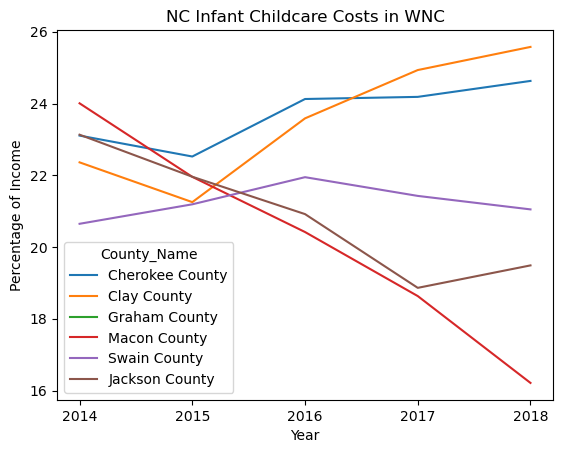

In [30]:
sns.lineplot(mount_df, x='StudyYear', y='Inf_Perc', hue='County_Name')
plt.xlabel('Year')
plt.xticks(np.arange(2014, 2019, step=1))
plt.ylabel('Percentage of Income')
plt.title('NC Infant Childcare Costs in WNC')

Text(0.5, 1.0, 'NC Infant Childcare Costs around NE NC and the Coast')

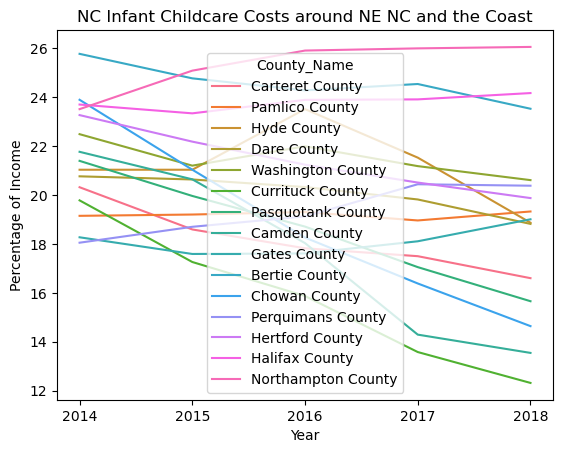

In [31]:
sns.lineplot(necoast_df, x='StudyYear', y='Inf_Perc', hue='County_Name')
plt.xlabel('Year')
plt.xticks(np.arange(2014, 2019, step=1))
plt.ylabel('Percentage of Income')
plt.title('NC Infant Childcare Costs around NE NC and the Coast')

In [32]:
wilm

['New Hanover', 'Brunswick', 'Columbus', 'Pender', 'Onslow']

In [33]:
wilm_df

,County_Name,StudyYear,MHI,MCInfant,MCToddler,MCPreschool,MCSA,Inf_Perc,Todd_Perc,Pre_Perc,SA_Perc
6,New Hanover County,2014,49582.0,220.51,199.78,199.09,153.61,23.126377,20.952281,20.879916,16.110121
7,New Hanover County,2015,50088.0,209.13,193.58,183.07,141.24,21.711308,20.096949,19.005830,14.663153
8,New Hanover County,2016,51232.0,204.41,187.38,167.04,128.88,20.747423,19.018894,16.954403,13.081199
9,New Hanover County,2017,51457.0,199.70,181.18,151.02,116.51,20.180733,18.309190,15.261364,11.773947
10,New Hanover County,2018,52716.0,194.99,174.99,134.99,104.15,19.234160,17.261325,13.315654,10.273541
17,Brunswick County,2014,46955.0,192.71,176.33,168.47,129.98,21.341540,19.527548,18.657097,14.394548
18,Brunswick County,2015,46859.0,182.03,168.50,159.35,122.94,20.200090,18.698649,17.683263,13.642801
19,Brunswick County,2016,49356.0,176.35,160.66,150.23,115.91,18.579707,16.926655,15.827782,12.211930
20,Brunswick County,2017,51164.0,170.67,152.83,141.11,108.87,17.345868,15.532718,14.341568,11.064889
21,Brunswick County,2018,54406.0,164.99,144.99,131.99,101.83,15.769364,13.857810,12.615300,9.732677


In [71]:
wilm_df.to_excel('wilmington.xlsx', sheet_name='Wilmington', index=False)
clt_df.to_excel('charlotte.xlsx', sheet_name='Charlotte', index=False)
triad_df.to_excel('triad.xlsx', sheet_name='Triad', index=False)
triangle_df.to_excel('triangle.xlsx', sheet_name='Triangle', index=False)
asheville_df.to_excel('asheville.xlsx', sheet_name='Asheville', index=False)
boone_df.to_excel('boone.xlsx', sheet_name='Boone', index=False)
faylumb_df.to_excel('faylumb.xlsx', sheet_name='FayLumb', index=False)
gville_df.to_excel('greenville.xlsx', sheet_name='Greenville', index=False)
necoast_df.to_excel('necoast.xlsx', sheet_name='NE Coast', index=False)
mount_df.to_excel('wncmountains.xlsx', sheet_name='WNC Mountains', index=False)